In [14]:
import geowombat as gw
import numpy as np
import xarray as xr
from geowombat.data import rgbn
import os
import pathlib
import matplotlib.pyplot as plt

IMAGE_DIR = pathlib.Path("/data1/malto/sigspatial/")
image_names = [name for name in os.listdir(IMAGE_DIR) if name.split(".")[-1] == "tif"]

with gw.open(IMAGE_DIR / image_names[0]) as src:
    print(src)
    print(src.gw)

<xarray.DataArray (band: 3, y: 159999, x: 87040)>
dask.array<open_rasterio-117f02ab2a7ccc93e59a1098b38e8cfb<this-array>, shape=(3, 159999, 87040), dtype=uint8, chunksize=(3, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3
  * x        (x) float64 -5.684e+06 -5.684e+06 ... -2.358e+06 -2.358e+06
  * y        (y) float64 1.565e+07 1.565e+07 1.565e+07 ... 9.539e+06 9.539e+06
Attributes: (12/14)
    transform:           (38.21851414258808, 0.0, -5684468.919511961, 0.0, -3...
    crs:                 3857
    res:                 (38.21851414258808, 38.21851414258808)
    is_tiled:            1
    nodatavals:          (0.0, 0.0, 0.0)
    _FillValue:          0.0
    ...                  ...
    filename:            /data1/malto/sigspatial/Greenland26X_22W_Sentinel2_2...
    resampling:          nearest
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  BILINEAR
    _data_are_separate:  0
    _data_are_stacked:   0


In [24]:
import rasterio

dataset = rasterio.open(IMAGE_DIR / image_names[0]).read()
dataset

<xarray.DataArray (band: 3, y: 159999, x: 87040)>
dask.array<open_rasterio-117f02ab2a7ccc93e59a1098b38e8cfb<this-array>, shape=(3, 159999, 87040), dtype=uint8, chunksize=(3, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3
  * x        (x) float64 -5.684e+06 -5.684e+06 ... -2.358e+06 -2.358e+06
  * y        (y) float64 1.565e+07 1.565e+07 1.565e+07 ... 9.539e+06 9.539e+06
Attributes: (12/14)
    transform:           (38.21851414258808, 0.0, -5684468.919511961, 0.0, -3...
    crs:                 3857
    res:                 (38.21851414258808, 38.21851414258808)
    is_tiled:            1
    nodatavals:          (0.0, 0.0, 0.0)
    _FillValue:          0.0
    ...                  ...
    filename:            /data1/malto/sigspatial/Greenland26X_22W_Sentinel2_2...
    resampling:          nearest
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  BILINEAR
    _data_are_separate:  0
    _data_are_stacked:   0
<xarray.DataArray (band: 3, y: 1000, x: 

KeyboardInterrupt: 

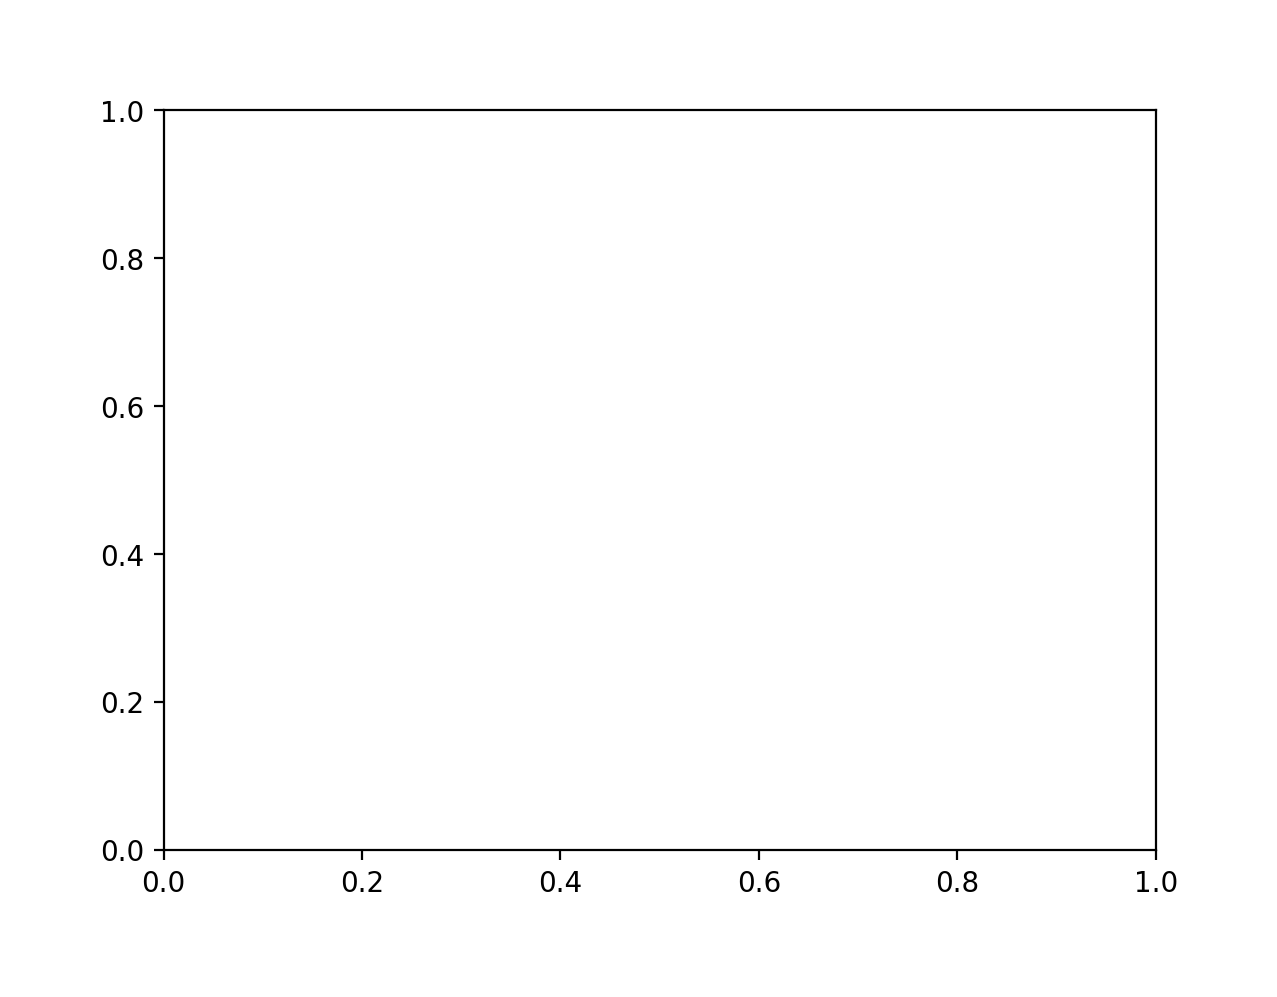

In [19]:
fig, ax = plt.subplots(dpi=200)

with gw.open(IMAGE_DIR / image_names[0]) as src:
    print(src)
    print(src[:1000,:1000])
    src_tr = src.gw.transform_crs(src, dst_res=(10, 10), resampling='bilinear')
    src_tr.where(src != 0).sel(band=[3, 2, 1]).gw.imshow(robust=True, ax=ax)

plt.tight_layout(pad=1)